In [1]:
import pandas as pd
import numpy as np
import joblib
from sklearn.metrics import classification_report
from plot_cm import plot

In [2]:
root = "../../"

In [3]:
data=pd.read_excel(root+r"data\data_uji\data_ujiX1234.xlsx")
komentar2 = data.komentar_bersih.tolist()
komentar = data.komentar.tolist()
y_true  = data.label.tolist()
data.head()

,Column1,Unnamed: 0,Unnamed: 1,label,komentar,komentar_bersih
0,741.0,741.0,1,non spam,@nurtunggali hanya di @rissa_skincare y say.. ...,nurtunggali risa skin care y nan awas hati 2 o...
1,777.0,777.0,2,non spam,@legitenak hahahaha balajaer mah gitu kadang b...,legitenak nan balajaer mah gitu kadang buta sm...
2,790.0,790.0,3,non spam,"@bundanya.anak.anak lu lah, muka kayak mak la...",badan anak anak lu lah muka kayak mak lampir s...
3,855.0,855.0,4,non spam,"@lazarus_smith1717 anyway parameter kita beda,...",lazarus smith 1717 anyway parameter beda gue o...
4,869.0,869.0,5,non spam,@awukyu iyalah akun bodong yg doyan nyinyir ka...,awukyu iya akun bodong doyan nyinyir kaya lu o...


In [4]:
#load model
path = root+r"Pemodelan/data1/"

In [5]:
pembobotan_imbang_freq = joblib.load(path+"tak_imbang/"+"pembobotan_tf.w")
pembobotan_imbang_bin = joblib.load(path+"tak_imbang/"+"pembobotan_bin.w")

# CNB

In [69]:
cnb_tfidf = joblib.load(path+"tak_imbang/"+"cnb_tfidf.model")
cnb_tf = joblib.load(path+"tak_imbang/"+"cnb_tf.model")
cnb_bin = joblib.load(path+"tak_imbang/"+"cnb_bin.model")

### 1. TFIDF

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)
              precision    recall  f1-score   support

    non spam       0.90      0.97      0.93       726
        spam       0.97      0.89      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451




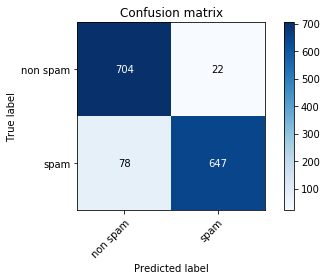

In [70]:
cnb_tfidf.set_params(alpha = 1)
# print(cnb_tfidf)
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(plot.plot_confusion_matrix(y_true,y_pred))
print(classification_report(y_true, y_pred))
print("")

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)
              precision    recall  f1-score   support

    non spam       0.99      0.98      0.99       726
        spam       0.98      0.99      0.99       725

    accuracy                           0.99      1451
   macro avg       0.99      0.99      0.99      1451
weighted avg       0.99      0.99      0.99      1451



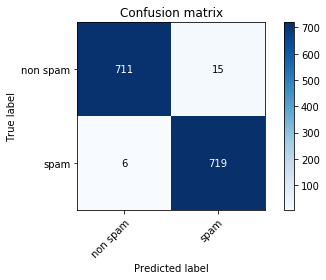

In [71]:
y_pred = cnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
print(plot.plot_confusion_matrix(y_true,y_pred))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
# print(plot.plot_confusion_matrix(y_true,y_pred,target_names ))

In [72]:
# data["prediksi"] = y_pred
# data.to_excel("tambahan_prediksi2.xlsx")

### 2. TF

              precision    recall  f1-score   support

    non spam       0.91      0.95      0.93       726
        spam       0.95      0.90      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


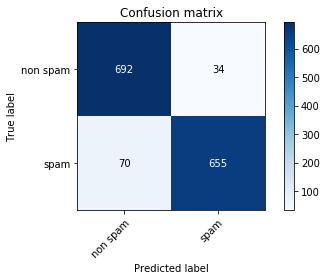

In [73]:
cnb_tf.set_params(alpha = 4)
y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

              precision    recall  f1-score   support

    non spam       0.99      0.96      0.97       726
        spam       0.96      0.99      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


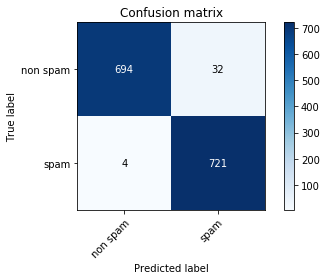

In [74]:
y_pred = cnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 3. Bin 

              precision    recall  f1-score   support

    non spam       0.91      0.95      0.93       726
        spam       0.95      0.90      0.93       725

    accuracy                           0.93      1451
   macro avg       0.93      0.93      0.93      1451
weighted avg       0.93      0.93      0.93      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


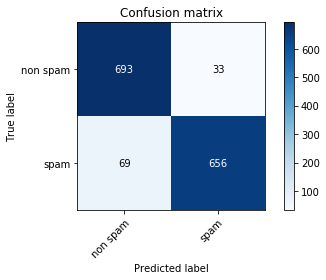

In [75]:
cnb_tf.set_params(alpha = 3.5)
y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

    non spam       1.00      0.96      0.98       726
        spam       0.96      1.00      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


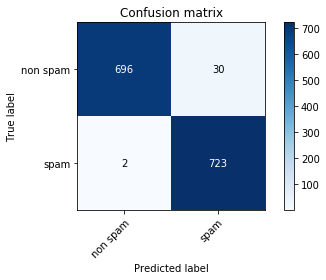

In [76]:

print("")
y_pred = cnb_bin.predict(pembobotan_imbang_bin.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

# MNB

In [77]:
mnb_tfidf = joblib.load(path+"tak_imbang/"+"mnb_tfidf.model")
mnb_tf = joblib.load(path+"tak_imbang/"+"mnb_tf.model")
mnb_bin = joblib.load(path+"tak_imbang/"+"mnb_bin.model")

### 1. TFIDF

In [78]:
y_pred = mnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

        spam       0.85      0.98      0.91       726
    non spam       0.98      0.82      0.89       725

    accuracy                           0.90      1451
   macro avg       0.91      0.90      0.90      1451
weighted avg       0.91      0.90      0.90      1451



### 2. TF

In [42]:
y_pred = mnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        spam       0.80      0.98      0.88       509
    non spam       0.98      0.83      0.90       747

    accuracy                           0.89      1256
   macro avg       0.89      0.91      0.89      1256
weighted avg       0.91      0.89      0.89      1256



# 3. Bin

In [43]:
y_pred = mnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

        spam       0.78      0.98      0.87       509
    non spam       0.98      0.82      0.89       747

    accuracy                           0.88      1256
   macro avg       0.88      0.90      0.88      1256
weighted avg       0.90      0.88      0.88      1256



# Gaussian

In [6]:
gnb_tfidf = joblib.load(path+"tak_imbang/"+"gnb_tfidf.model")
gnb_tf = joblib.load(path+"tak_imbang/"+"gnb_tf.model")
gnb_bin = joblib.load(path+"tak_imbang/"+"gnb_bin.model")

### 1. TFIDF

              precision    recall  f1-score   support

    non spam       0.80      0.95      0.87       726
        spam       0.94      0.77      0.84       725

    accuracy                           0.86      1451
   macro avg       0.87      0.86      0.86      1451
weighted avg       0.87      0.86      0.86      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


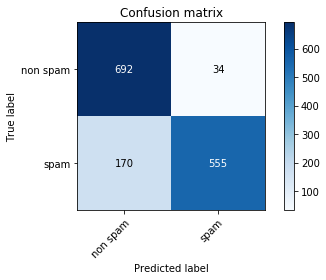

In [27]:
gnb_tfidf.var_smoothing=0.2
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

    non spam       0.91      0.99      0.95       726
        spam       0.99      0.91      0.95       725

    accuracy                           0.95      1451
   macro avg       0.95      0.95      0.95      1451
weighted avg       0.95      0.95      0.95      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


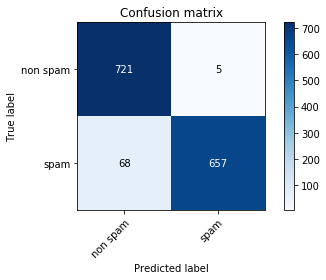

In [36]:
print("")
gnb_tfidf.var_smoothing=0.4
y_pred = gnb_tfidf.predict(pembobotan_imbang_freq.transform(komentar2))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 2. TF

In [ ]:
gnb_tf.var_smoothing=0.5
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

    non spam       0.96      0.84      0.89       726
        spam       0.85      0.96      0.91       725

    accuracy                           0.90      1451
   macro avg       0.91      0.90      0.90      1451
weighted avg       0.91      0.90      0.90      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


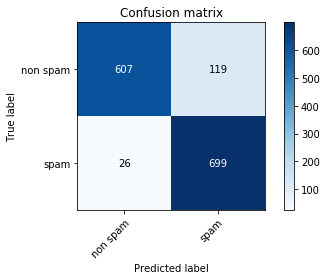

In [42]:
gnb_tf.var_smoothing=0.4
print("")
y_pred = gnb_tf.predict(pembobotan_imbang_freq.transform(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

### 3. BIN

              precision    recall  f1-score   support

    non spam       0.81      0.52      0.63       726
        spam       0.64      0.87      0.74       725

    accuracy                           0.70      1451
   macro avg       0.73      0.70      0.69      1451
weighted avg       0.73      0.70      0.69      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


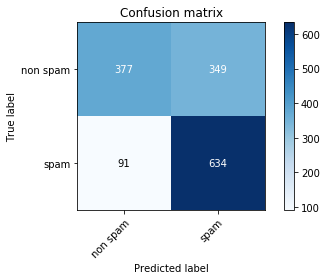

In [84]:
gnb_tf.var_smoothing=0.4
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))


              precision    recall  f1-score   support

    non spam       0.88      0.58      0.70       726
        spam       0.69      0.92      0.79       725

    accuracy                           0.75      1451
   macro avg       0.78      0.75      0.74      1451
weighted avg       0.78      0.75      0.74      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


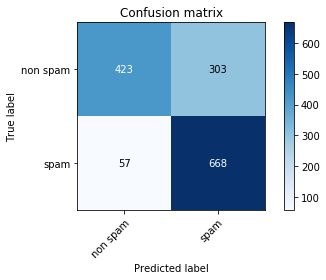

In [89]:

print("")
y_pred = gnb_bin.predict(pembobotan_imbang_bin.transform(komentar2).A)
# target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))

# NBC

In [86]:
nbc_bin = joblib.load(path+"tak_imbang/"+"nbc_bin.model")
nbc_bin.alpha = 2

2
              precision    recall  f1-score   support

    non spam       0.83      0.98      0.90       726
        spam       0.98      0.80      0.88       725

    accuracy                           0.89      1451
   macro avg       0.90      0.89      0.89      1451
weighted avg       0.90      0.89      0.89      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


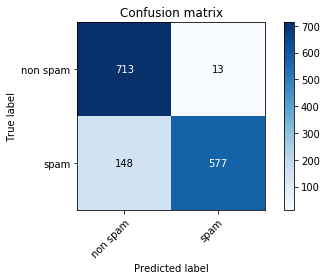

In [87]:
print(nbc_bin.alpha)
y_pred = nbc_bin.predict(np.array(komentar))
# target_names = list(set(y_true))
print(classification_report(y_true,y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
del y_pred

              precision    recall  f1-score   support

    non spam       0.97      0.98      0.98       726
        spam       0.98      0.97      0.98       725

    accuracy                           0.98      1451
   macro avg       0.98      0.98      0.98      1451
weighted avg       0.98      0.98      0.98      1451

AxesSubplot(0.0706597,0.255582;0.723472x0.651362)


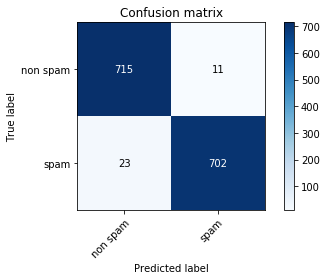

In [88]:
y_pred = nbc_bin.predict(np.array(komentar2))
target_names = list(set(y_true))
print(classification_report(y_true, y_pred))
print(plot.plot_confusion_matrix(y_true,y_pred))
del y_pred